In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('C:/Users/Jae/Documents/cds-411/Week_3')
import schelling

In [2]:
def Unhappy(grid,delta=0.1):
    V,H = grid.shape
    ans = np.zeros((V,H),int)
    #topleft
    ans[:-1,:-1] += (abs(grid[1:,1:]-grid[:-1,:-1]) > delta)*(grid[1:,1:]!=0.0).astype(int)
    #above
    ans[:-1,:] += (abs(grid[1:,:]-grid[:-1,:]) > delta)*(grid[1:,:]!=0.0).astype(int)
    #topright
    ans[:-1,1:] += (abs(grid[1:,:-1]-grid[:-1,1:]) > delta)*(grid[1:,:-1]!=0.0).astype(int)
    #right
    ans[:,1:] += (abs(grid[:,:-1]-grid[:,1:]) > delta)*(grid[:,:-1]!=0.0).astype(int)
    #left
    ans[:,:-1] += (abs(grid[:,1:]-grid[:,:-1]) > delta)*(grid[:,1:]!=0.0).astype(int)
    #bottomright
    ans[1:,:-1] += (abs(grid[:-1,1:]-grid[1:,:-1]) > delta)*(grid[:-1,1:]!=0.0).astype(int)
    #below
    ans[1:,:] += (abs(grid[:-1,:]-grid[1:,:]) > delta)*(grid[:-1,:]!=0.0).astype(int)
    #bottomleft
    ans[1:,1:] += (abs(grid[:-1,:-1]-grid[1:,1:]) > delta)*(grid[1:,1:]!=0.0).astype(int)
    ans *= (grid != 0.0)
    return ans

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def Init(x,y,pctempty):
    emptycellcount = int(x * y * pctempty);
    grid = np.random.random((x,y));
    
    for i in range(emptycellcount):
        rand1 = np.random.randint(0,x);
        rand2 = np.random.randint(0,y);
        while (grid[rand1,rand2] == 0.0):
            rand1 = np.random.randint(0,x);
            rand2 = np.random.randint(0,y);
        grid[rand1,rand2]=0;
    return grid;

In [4]:
def CollectGrumps(uhap, gamma=5):
    mask = uhap>=gamma
    v,h = mask.nonzero()
    return v,h

def FindEmpty(grid):
    ev,eh = (grid==0.0).nonzero()
    return ev,eh

def Move1Unhappy(v,h,ev,eh,grid):
    N = len(v)
    if N>0:
        me = np.random.randint(0,N)
        mover = v[me],h[me]
        M = len(ev)
        me = np.random.randint(0,M)
        newloc = ev[me],eh[me]
        # move
        grid[newloc] = grid[mover]
        grid[mover] = 0

In [5]:
def Iterate(grid,gamma,delta):
    u = Unhappy(grid,delta)
    v,h = CollectGrumps(u,gamma)
    ev,eh = FindEmpty(grid)
    Move1Unhappy(v,h,ev,eh,grid)

In [6]:
def Go(V,H,pctempty,interval,N,delta,gamma):
    grid = Init(V,H,pctempty)
    u = Unhappy(grid,delta)
    SegregationScore = (1-(u>=gamma).sum()/(V*H))*100
    print(f"Iteration: 0 , Segregation Score: {SegregationScore:.2f}%")
    plt.imshow(grid,cmap="gray");
    plt.show()
    for i in range(interval):
        for j in range(N):
            Iterate(grid,gamma,delta)
        u = Unhappy(grid,delta)
        SegregationScore2 = (1-(u>=gamma).sum()/(V*H))*100
        print(f"Iteration: {N*(i+1)} , Segregation Score: {SegregationScore2:.2f}%")
        #imageio.imsave('dud'+str(i) + '.png',(100*grid).astype(np.uint8))
        
        plt.imshow(grid,cmap="gray");
        plt.show()

100
Iteration: 0 , Segregation Score: 46.26%


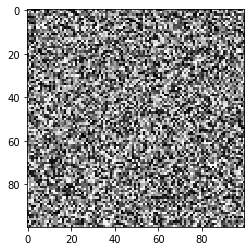

Iteration: 10000 , Segregation Score: 74.92%


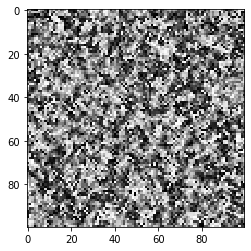

Iteration: 20000 , Segregation Score: 90.73%


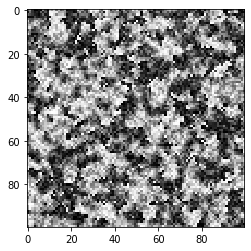

Iteration: 30000 , Segregation Score: 96.60%


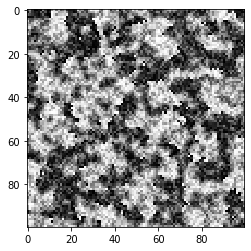

Iteration: 40000 , Segregation Score: 98.91%


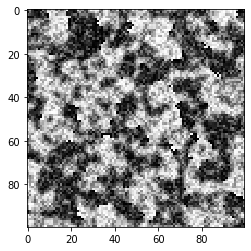

Iteration: 50000 , Segregation Score: 99.89%


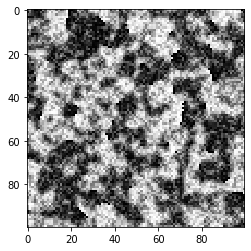

In [7]:
Go(100,100,0.01,5,10000,0.4,3)

1000
Iteration: 0 , Segregation Score: 31.31%


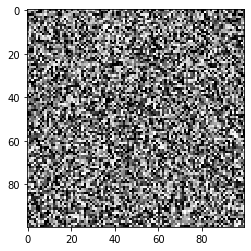

Iteration: 10000 , Segregation Score: 52.04%


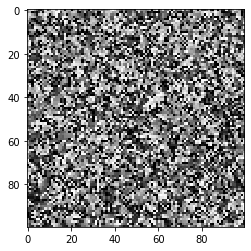

Iteration: 20000 , Segregation Score: 65.79%


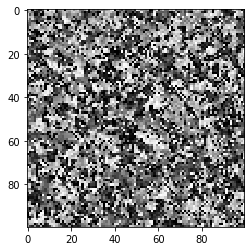

Iteration: 30000 , Segregation Score: 78.87%


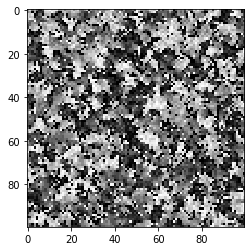

Iteration: 40000 , Segregation Score: 90.30%


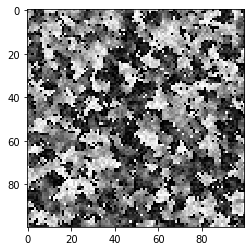

Iteration: 50000 , Segregation Score: 100.00%


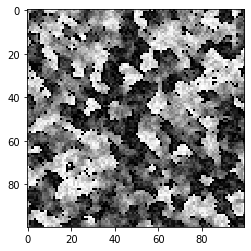

In [8]:
Go(100,100,0.10,5,10000,0.2,4)

1000
Iteration: 0 , Segregation Score: 14.00%


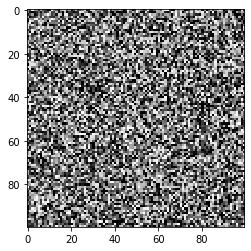

Iteration: 150000 , Segregation Score: 18.30%


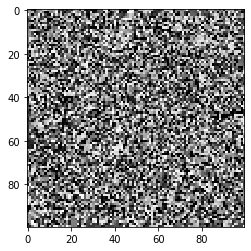

Iteration: 300000 , Segregation Score: 18.47%


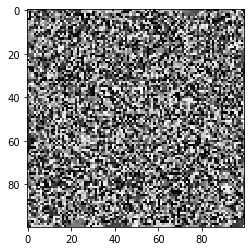

Iteration: 450000 , Segregation Score: 19.75%


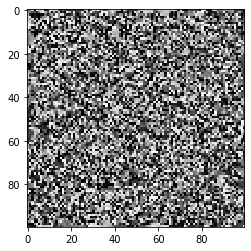

Iteration: 600000 , Segregation Score: 19.66%


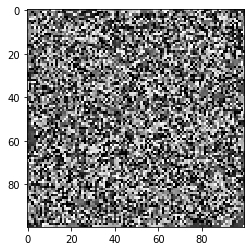

Iteration: 750000 , Segregation Score: 20.02%


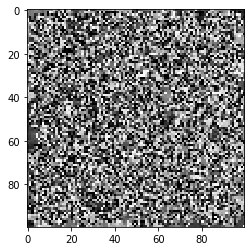

Iteration: 900000 , Segregation Score: 20.03%


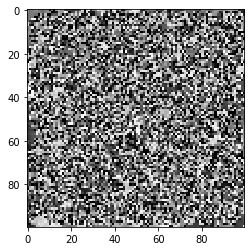

Iteration: 1050000 , Segregation Score: 19.74%


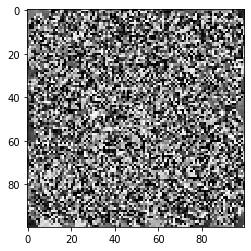

Iteration: 1200000 , Segregation Score: 20.65%


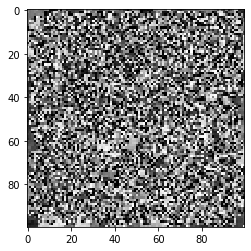

Iteration: 1350000 , Segregation Score: 20.20%


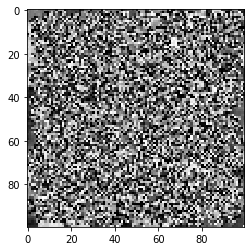

Iteration: 1500000 , Segregation Score: 20.28%


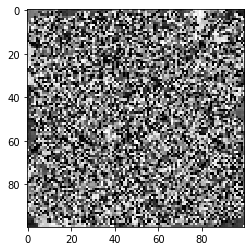

In [199]:
Go(100,100,0.10,10,150000,0.1,4)